In [79]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_curve, auc
import pickle

%matplotlib inline

In [80]:
w2v = pd.read_pickle('../data/model/biom_dim_w2v_True_1_120_15.pkl')

In [81]:
training_data = pd.read_pickle('../data/model/ibd_training_data.pkl')

In [82]:
target = training_data[['ibd']]
df = w2v.merge(target, left_index=True, right_index=True, how='inner')

In [97]:
X = df.drop('ibd', axis=1)

df_dict = {}
for column in X.columns:
    values = []
    for value in X[column].values:
        values.append(value)

    df_dict[column] = values

new_X = pd.DataFrame(data=df_dict, index=X.index)
y = df['ibd']

x_train, x_test, y_train, y_test = train_test_split(new_X, y, test_size=0.33, random_state=1)

In [84]:
with open('../data/model/ibd_w2v_True_1_120_15_350_7_True_xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [85]:
predictions = model.predict(x_test)


test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, predictions).ravel()
test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1_score = f1_score(y_test, predictions)

pd.Series(predictions).value_counts()

0.0    4483
1.0      74
dtype: int64

In [86]:
test_set = x_test
pca = PCA(n_components=3)
test_set = pd.DataFrame(pca.fit_transform(x_test))
test_set['predictions'] = predictions
test_set['ibd'] = y.reset_index(drop=True)
test_set['bad'] = test_set['ibd'].astype(int) ^ test_set['predictions'].astype(int)
test_set

,0,1,2,predictions,ibd,bad
0,-2.933663,0.143266,0.801439,0.0,0.0,0
1,-2.991440,2.605511,-0.467291,0.0,0.0,0
2,3.131453,-0.763501,-0.068766,0.0,0.0,0
3,-0.916714,0.591147,2.818929,0.0,0.0,0
4,-2.367268,0.706600,-0.206563,0.0,0.0,0
5,-1.639856,2.528338,0.014250,0.0,0.0,0
6,0.309262,1.270083,0.188016,0.0,0.0,0
7,-2.306619,0.966747,-0.991407,0.0,0.0,0
8,0.044716,-0.004128,1.510567,0.0,0.0,0
9,-0.932986,0.905163,-0.808888,0.0,0.0,0


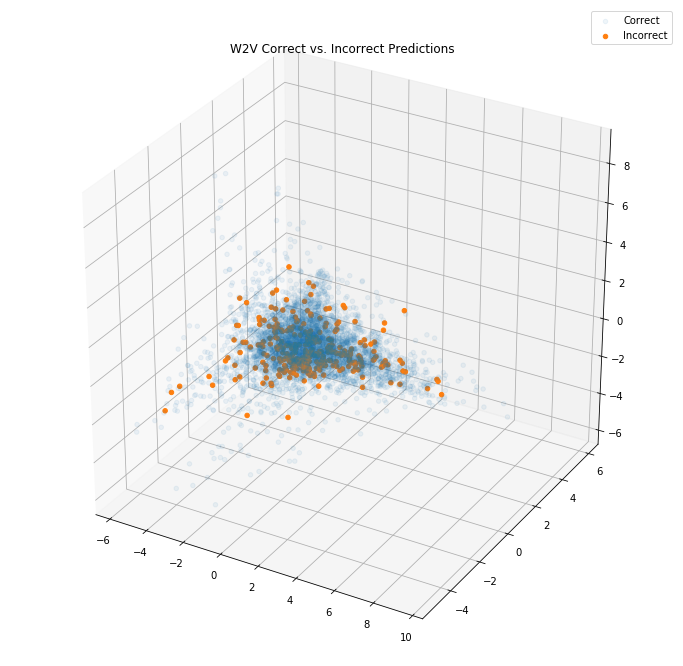

In [88]:
only_bad = test_set[test_set['bad'] == 1]
not_bad = test_set[test_set['bad'] == 0]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x, y, z= not_bad[0], not_bad[1], not_bad[2]
ax.scatter(x, y, z, alpha=.07, label='Correct')

x, y, z= only_bad[0], only_bad[1], only_bad[2]
ax.scatter(x, y, z, alpha=1, label='Incorrect')

plt.title('W2V Correct vs. Incorrect Predictions')
plt.legend()
plt.show()

# x, y, z= not_bad[0], not_bad[1], not_bad[2]
# fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(x, y, z, alpha=.5)
# plt.show()

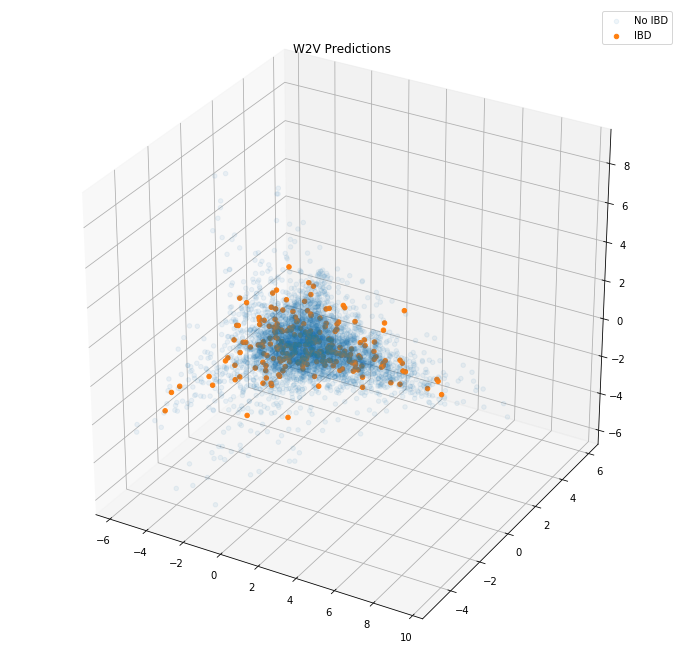

In [89]:
has_ibd = test_set[test_set['ibd'] == 1]
no_ibd = test_set[test_set['ibd'] == 0]
# merged = pd.concat([no_ibd.sample(len(has_ibd)), has_ibd])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x, y, z = no_ibd[0], no_ibd[1], no_ibd[2]
ax.scatter(x, y, z, alpha=.07, label='No IBD')


x, y, z = has_ibd[0], has_ibd[1], has_ibd[2]
ax.scatter(x, y, z, alpha=1, label='IBD')

plt.title('W2V Predictions')
plt.legend()
plt.show()


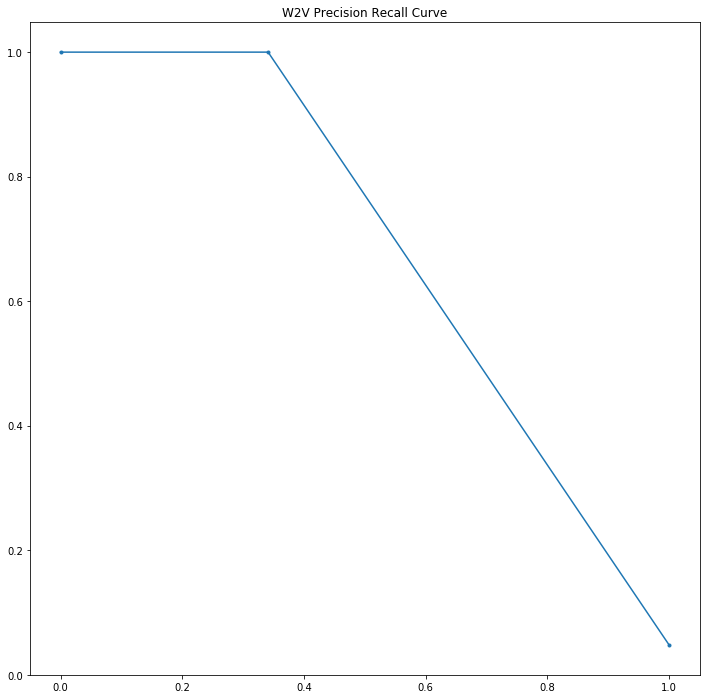

In [91]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

plt.plot(recall, precision, marker='.')
plt.title('W2V Precision Recall Curve')
plt.show()

In [92]:
auc(recall, precision)

0.6861970594689488

In [98]:
test_set = x_test
pca = PCA()
test_set = pd.DataFrame(pca.fit_transform(x_test))
test_set['predictions'] = predictions
test_set['ibd'] = y.reset_index(drop=True)
test_set['bad'] = test_set['ibd'].astype(int) ^ test_set['predictions'].astype(int)
test_set

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,predictions,ibd,bad
0,-2.933663,0.143266,0.801439,-0.284604,0.212445,-0.902615,-0.333308,-0.383245,-0.393775,0.126288,...,-0.003309,0.007861,0.004648,-0.009270,-0.001811,0.000181,0.000449,0.0,0.0,0
1,-2.991440,2.605511,-0.467291,0.433509,-0.321342,0.099895,0.064704,0.121952,-0.045740,0.219884,...,0.003862,-0.002335,0.001579,0.000604,-0.000390,0.000369,-0.001434,0.0,0.0,0
2,3.131453,-0.763501,-0.068766,-0.607852,0.362514,0.750468,0.455905,-0.034095,0.335882,0.090831,...,0.005409,-0.001091,-0.004325,-0.004538,-0.001496,-0.000297,0.000433,0.0,0.0,0
3,-0.916714,0.591147,2.818929,-3.750336,0.515338,2.194990,-1.137913,-0.803699,2.887936,0.430303,...,0.002964,0.006053,-0.002843,0.001903,-0.006267,-0.000539,0.003345,0.0,0.0,0
4,-2.367268,0.706600,-0.206563,0.298974,0.143788,0.102716,0.235017,-0.358121,-0.016721,-0.226357,...,-0.008835,-0.003757,0.000572,0.001744,0.007909,0.004959,0.005456,0.0,0.0,0
5,-1.639856,2.528338,0.014250,0.738219,-0.387980,0.603852,0.850690,-0.008057,-0.553610,0.539572,...,-0.002836,-0.007442,0.006656,0.002290,-0.009381,0.005241,0.003983,0.0,0.0,0
6,0.309262,1.270083,0.188016,-1.054437,0.163998,0.639710,-0.158429,-0.293162,0.705354,0.240082,...,-0.004642,-0.004715,-0.000556,-0.002435,-0.001101,0.005877,-0.003465,0.0,0.0,0
7,-2.306619,0.966747,-0.991407,0.020593,0.551548,-0.101046,0.285296,0.274017,0.164337,0.102531,...,-0.002482,-0.001788,0.002495,0.001351,-0.004087,-0.000754,0.001483,0.0,0.0,0
8,0.044716,-0.004128,1.510567,-0.604046,-0.106614,0.190143,-0.594169,-0.005819,0.586762,0.024981,...,0.000062,0.000328,-0.000625,-0.001097,0.002767,0.001657,-0.001957,0.0,0.0,0
9,-0.932986,0.905163,-0.808888,-0.758076,0.698425,-0.352025,-0.149853,-0.393402,-0.205994,-0.085874,...,0.007918,0.007735,-0.010729,-0.001216,0.000857,0.004398,0.003121,0.0,0.0,0


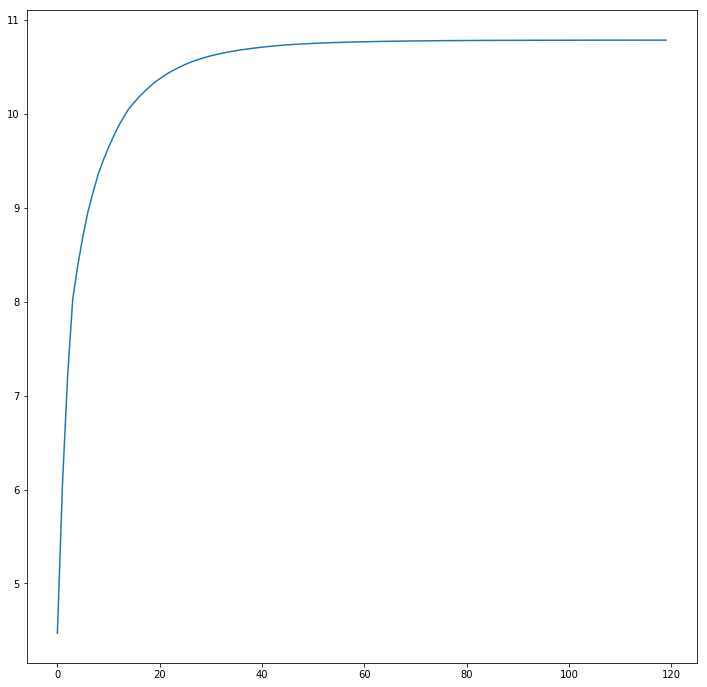

In [99]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_))
plt.show()

In [93]:
with open('../data/model/ibd_simple_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [100]:
X = training_data.drop('ibd', axis=1)
target = training_data[['ibd']]

x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=1)

In [101]:
x_test = x_test.fillna(0)
predictions = model.predict(x_test)


test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, predictions).ravel()
test_accuracy = accuracy_score(y_test, predictions)
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1_score = f1_score(y_test, predictions)

pd.Series(predictions).value_counts()

0.0    4455
1.0     102
dtype: int64

In [103]:
test_set = x_test
pca = PCA(n_components=3)
test_set = pd.DataFrame(pca.fit_transform(x_test))
test_set['predictions'] = predictions
test_set['ibd'] = y_test.reset_index(drop=True)
test_set['bad'] = test_set['ibd'].astype(int) ^ test_set['predictions'].astype(int)

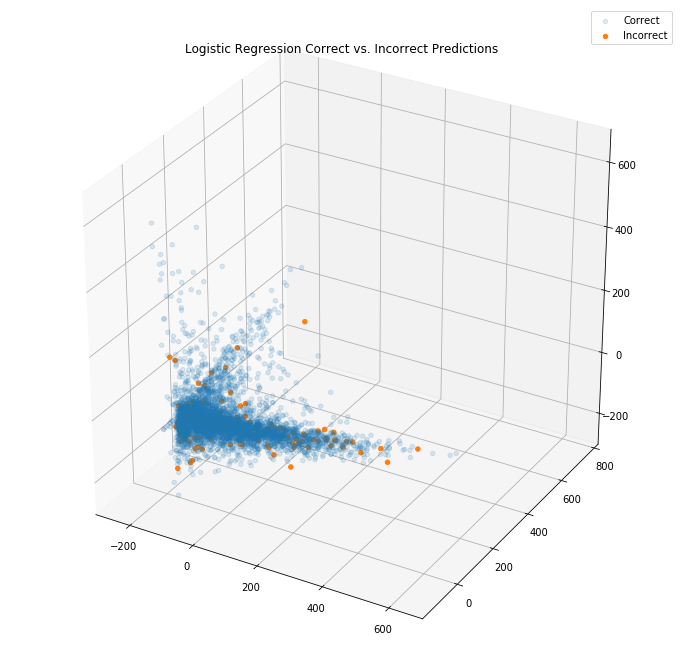

In [104]:
only_bad = test_set[test_set['bad'] == 1]
not_bad = test_set[test_set['bad'] == 0]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x, y, z= not_bad[0], not_bad[1], not_bad[2]
ax.scatter(x, y, z, alpha=.15, label='Correct')

x, y, z= only_bad[0], only_bad[1], only_bad[2]
ax.scatter(x, y, z, alpha=1, label='Incorrect')

plt.title('Logistic Regression Correct vs. Incorrect Predictions')
plt.legend()
plt.show()


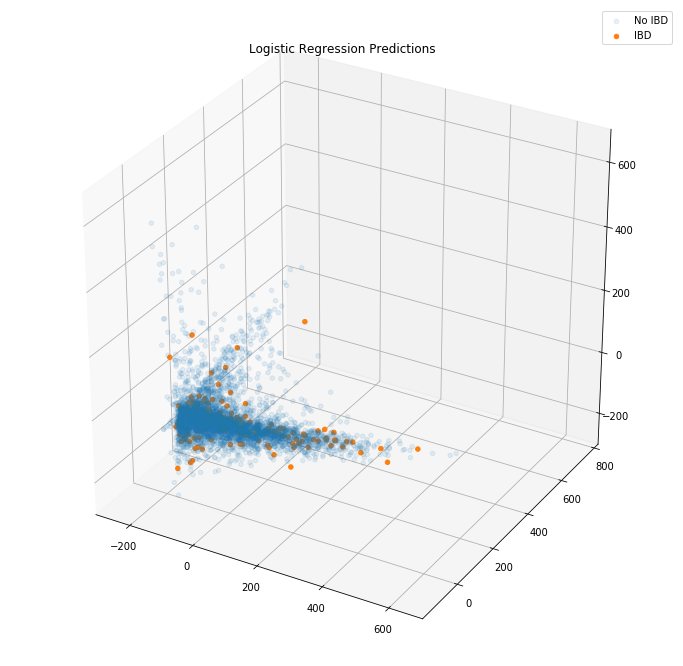

In [105]:
has_ibd = test_set[test_set['ibd'] == 1]
no_ibd = test_set[test_set['ibd'] == 0]
# merged = pd.concat([no_ibd.sample(len(has_ibd)), has_ibd])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x, y, z = no_ibd[0], no_ibd[1], no_ibd[2]
ax.scatter(x, y, z, alpha=.1, label='No IBD')


x, y, z = has_ibd[0], has_ibd[1], has_ibd[2]
ax.scatter(x, y, z, alpha=1, label='IBD')

plt.title('Logistic Regression Predictions')
plt.legend()
plt.show()

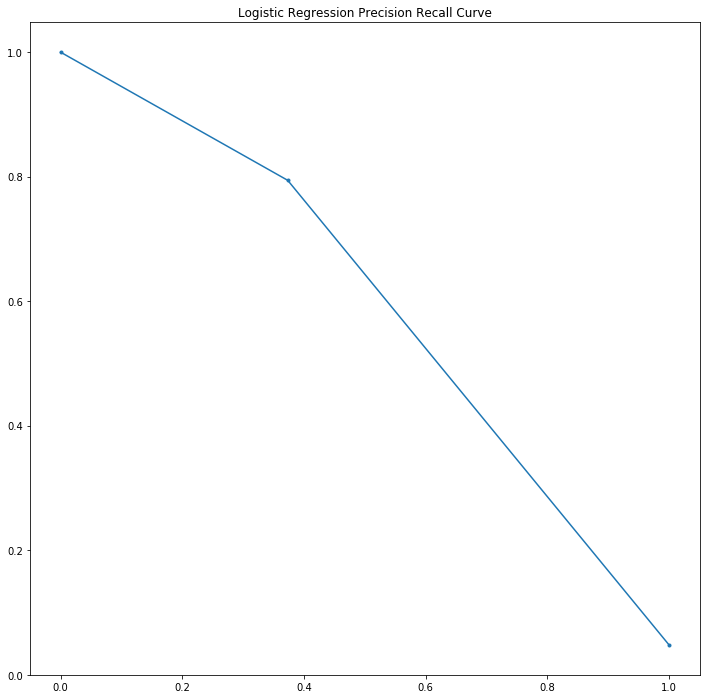

In [106]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

plt.plot(recall, precision, marker='.')
plt.title('Logistic Regression Precision Recall Curve')

plt.show()

In [107]:
auc(recall, precision)

0.5986168661012792

In [110]:
test_set = x_test
pca = PCA()
test_set = pd.DataFrame(pca.fit_transform(x_test))
test_set['predictions'] = predictions
test_set['ibd'] = y.reset_index(drop=True)
test_set['bad'] = test_set['ibd'].astype(int) ^ test_set['predictions'].astype(int)
test_set

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_))
plt.show()